In [31]:
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

In [33]:
df = pd.read_csv('./Population of all US Cities 2024.csv')

In [37]:
# Cities list with corrected Nashville entry
cities = ["Atlanta", "Austin", "Chicago", "Denver", "Los Angeles", 
          "Nashville", "New York", "San Diego", "Boston", "Tampa"]

# Replace "Nashville (balance)" with "Nashville" in the DataFrame
df['US City'] = df['US City'].replace('Nashville (balance)', 'Nashville')

# Filter the DataFrame for the specified cities
filtered_df = df[df['US City'].isin(cities)]

# Display the filtered data
filtered_df

,Rank,US City,US State,Population 2024,Population 2020,Annual Change,Density (/mile2),Area (mile2)
0,1,New York,New York,8097282,8740292,-0.0195,26950,300.46
1,2,Los Angeles,California,3795936,3895848,-0.0065,8068,470.52
2,3,Chicago,Illinois,2638159,2743329,-0.0099,11584,227.75
7,8,San Diego,California,1388996,1386292,0.0005,4260,326.09
11,12,Austin,Texas,984567,965827,0.0048,3017,326.37
18,19,Denver,Colorado,716234,717606,-0.0005,4679,153.07
20,21,Nashville,Tennessee,687150,689700,-0.0009,1445,475.57
24,25,Boston,Massachusetts,646622,675466,-0.0110,13377,48.34
35,36,Atlanta,Georgia,514465,499896,0.0071,3804,135.25
48,49,Tampa,Florida,408510,387924,0.0128,3595,113.64


In [39]:
filtered_df_cleaned = filtered_df.iloc[:, :-2]
filtered_df_cleaned

,Rank,US City,US State,Population 2024,Population 2020,Annual Change
0,1,New York,New York,8097282,8740292,-0.0195
1,2,Los Angeles,California,3795936,3895848,-0.0065
2,3,Chicago,Illinois,2638159,2743329,-0.0099
7,8,San Diego,California,1388996,1386292,0.0005
11,12,Austin,Texas,984567,965827,0.0048
18,19,Denver,Colorado,716234,717606,-0.0005
20,21,Nashville,Tennessee,687150,689700,-0.0009
24,25,Boston,Massachusetts,646622,675466,-0.0110
35,36,Atlanta,Georgia,514465,499896,0.0071
48,49,Tampa,Florida,408510,387924,0.0128


In [41]:
filtered_df_cleaned['Annual Change'] = filtered_df_cleaned['Annual Change'].apply(lambda x: f"{round(x * 100, 2)}%")
# Display the updated dataframe
filtered_df_cleaned

,Rank,US City,US State,Population 2024,Population 2020,Annual Change
0,1,New York,New York,8097282,8740292,-1.95%
1,2,Los Angeles,California,3795936,3895848,-0.65%
2,3,Chicago,Illinois,2638159,2743329,-0.99%
7,8,San Diego,California,1388996,1386292,0.05%
11,12,Austin,Texas,984567,965827,0.48%
18,19,Denver,Colorado,716234,717606,-0.05%
20,21,Nashville,Tennessee,687150,689700,-0.09%
24,25,Boston,Massachusetts,646622,675466,-1.1%
35,36,Atlanta,Georgia,514465,499896,0.71%
48,49,Tampa,Florida,408510,387924,1.28%


In [43]:
filtered_df_cleaned['Rank'] = filtered_df_cleaned['Population 2024'].rank(ascending=False)

# Sort the dataframe by rank
ranked_cities_df = filtered_df_cleaned.sort_values(by='Rank')

# Display the ranked cities
ranked_cities_df

,Rank,US City,US State,Population 2024,Population 2020,Annual Change
0,1.0,New York,New York,8097282,8740292,-1.95%
1,2.0,Los Angeles,California,3795936,3895848,-0.65%
2,3.0,Chicago,Illinois,2638159,2743329,-0.99%
7,4.0,San Diego,California,1388996,1386292,0.05%
11,5.0,Austin,Texas,984567,965827,0.48%
18,6.0,Denver,Colorado,716234,717606,-0.05%
20,7.0,Nashville,Tennessee,687150,689700,-0.09%
24,8.0,Boston,Massachusetts,646622,675466,-1.1%
35,9.0,Atlanta,Georgia,514465,499896,0.71%
48,10.0,Tampa,Florida,408510,387924,1.28%


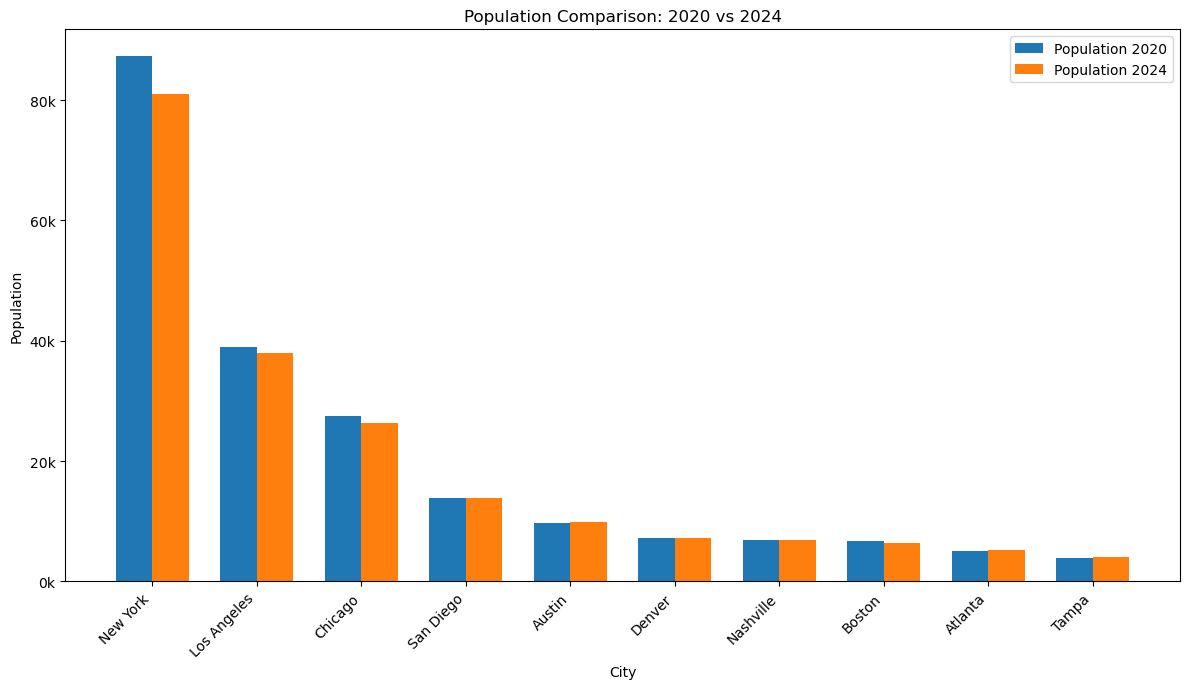

In [45]:
cities = filtered_df_cleaned['US City']

def thousands(x, pos):
    return f'{int(x / 100000)}k'

bar_width = 0.35
index = np.arange(len(cities))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the bars for Population 2020 and Population 2024
bars1 = ax.bar(index, filtered_df_cleaned['Population 2020'], bar_width, label='Population 2020')
bars2 = ax.bar(index + bar_width, filtered_df_cleaned['Population 2024'], bar_width, label='Population 2024')

# Add labels, title, and ticks
ax.set_xlabel('City')
ax.set_ylabel('Population')
ax.set_title('Population Comparison: 2020 vs 2024')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(cities, rotation=45, ha='right')

# Format the y-axis to show values in thousands
ax.yaxis.set_major_formatter(FuncFormatter(thousands))

# Add legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()